<a href="https://colab.research.google.com/github/KarolMartinez/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [20]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Añadir una columna que indique de qué tienda es cada fila
tienda['tienda'] = 'tienda1'
tienda2['tienda'] = 'tienda2'
tienda3['tienda'] = 'tienda3'
tienda4['tienda'] = 'tienda4'

# Combinar los cuatro datos en uno solo
tiendas_combinadas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Verificar cómo queda el dataframe combinado
tiendas_combinadas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,tienda1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,tienda1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,tienda1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,tienda1


In [ ]:
print(tiendas_combinadas.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')


In [ ]:
# Calcular facturación por nombres de tienda
tiendas_combinadas['facturacion_por_tienda'] = tiendas_combinadas['Precio'] * tiendas_combinadas['Cantidad de cuotas']
facturacion_por_tienda = tiendas_combinadas.groupby('tienda')['facturacion_por_tienda'].sum()
print(facturacion_por_tienda)

tienda
tienda1    3.422718e+09
tienda2    3.337189e+09
tienda3    3.243817e+09
tienda4    3.098827e+09
Name: facturacion_por_tienda, dtype: float64


In [ ]:
# Calcular la facturación por vendedores
facturacion_por_tienda = tiendas_combinadas.groupby('Vendedor')['facturacion_por_transaccion'].sum()
print(facturacion_por_tienda)

Vendedor
Beatriz Morales    302695600.0
Blanca Ramirez     299586600.0
Camila Rivera      303184200.0
Felipe Santos      353796000.0
Izabela de León    350342400.0
Juan Fernandez     308562100.0
Juliana Costa      338364700.0
Lucas Olivera      305403600.0
Maria Alfonso      349694800.0
Mariana Herrera    283302600.0
Pedro Gomez        313350900.0
Rafael Acosta      310292300.0
Santiago Silva     293418200.0
Ángel Rodriguez    291625200.0
Name: facturacion_por_transaccion, dtype: float64


# 2. Ventas por categoría

In [ ]:
ventas_por_categoria = tiendas_combinadas.groupby('Categoría del Producto').apply(
    lambda x: (x['Precio'] * x['Cantidad de cuotas']).sum()
).sort_values(ascending=False)
pd.options.display.float_format = '{:,.2f}'.format
print(ventas_por_categoria)

Categoría del Producto
Electrónicos              4,889,815,300.00
Electrodomésticos         4,019,072,300.00
Muebles                   2,221,980,800.00
Instrumentos musicales    1,044,612,400.00
Deportes y diversión        432,005,500.00
Juguetes                    211,615,600.00
Artículos para el hogar     170,360,400.00
Libros                      113,088,700.00
dtype: float64


<ipython-input-43-2a4e2193656c>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas_por_categoria = tiendas_combinadas.groupby('Categoría del Producto').apply(


# 3. Calificación promedio de la tienda


In [ ]:
calificaciones = ['Calificación']
tiendas = ['tienda1', 'tienda2', 'tienda3', 'tienda4']

tiendas_calificaciones = {}

# Llenar el diccionario con las calificaciones
for tienda, calificacion in zip(tiendas, calificaciones):
    if tienda not in tiendas_calificaciones:
        tiendas_calificaciones[tienda] = []
    tiendas_calificaciones[tienda].append(calificacion)

# Calcular el promedio por tienda
promedios = {}
for tienda in tiendas:
    tienda_df = tiendas_combinadas[tiendas_combinadas['tienda'] == tienda]
    promedio = tienda_df['Calificación'].mean()
    promedios[tienda] = promedio
print(promedios)


{'tienda1': np.float64(3.976685036032217), 'tienda2': np.float64(4.037303942348453), 'tienda3': np.float64(4.048325561678677), 'tienda4': np.float64(3.9957591178965224)}


# 4. Productos más y menos vendidos

In [ ]:
productos = ['tienda_combinadas']
tiendas = ['tienda1', 'tienda2', 'tienda3', 'tienda4']

# Crear un diccionario para almacenar las ventas por tienda y producto
tiendas_productos = {}

# Llenar el diccionario con las ventas
for tienda, producto in zip(tiendas, productos):
    if tienda not in tiendas_productos:
        tiendas_productos[tienda] = {}
    if producto not in tiendas_productos[tienda]:
        tiendas_productos[tienda][producto] = 0
    tiendas_productos[tienda][producto] += 1  # Contar la venta de un producto

# Calcular los productos más y menos vendidos por tienda
productos_mas_menos_vendidos = {}

for tienda, productos_ventas in tiendas_productos.items():
    # Ordenar los productos por la cantidad de ventas
    productos_ordenados = sorted(productos_ventas.items(), key=lambda x: x[1])
    mas_vendido = productos_ordenados[-1]  # Producto más vendido
    menos_vendido = productos_ordenados[0]  # Producto menos vendido
    productos_mas_menos_vendidos[tienda] = {
        'mas_vendido': mas_vendido,
        'menos_vendido': menos_vendido
    }

print(productos_mas_menos_vendidos)

{'tienda1': {'mas_vendido': ('Asistente virtual', 1), 'menos_vendido': ('Asistente virtual', 1)}, 'tienda2': {'mas_vendido': ('Mesa de comedor', 1), 'menos_vendido': ('Mesa de comedor', 1)}, 'tienda3': {'mas_vendido': ('Juego de mesa', 1), 'menos_vendido': ('Juego de mesa', 1)}, 'tienda4': {'mas_vendido': ('Microondas', 1), 'menos_vendido': ('Microondas', 1)}}


# 5. Envío promedio por tienda

In [ ]:
tiendas = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
costos_envio = ['costo de envío']

# Crear un diccionario para almacenar los costos de envío por tienda
tiendas_envio = {}

# Llenar el diccionario con los costos de envío
for tienda, costo in zip(tiendas, costos_envio):
    if tienda not in tiendas_envio:
        tiendas_envio[tienda] = []
    tiendas_envio[tienda].append(costo)  # Añadir el costo de envío a la lista de la tienda

# Calcular el costo de envío promedio por tienda
envios_promedio = tiendas_combinadas.groupby('tienda')['Costo de envío'].mean()

# Mostrar los resultados
print(envios_promedio)


tienda
tienda1   26,018.61
tienda2   25,216.24
tienda3   24,805.68
tienda4   23,459.46
Name: Costo de envío, dtype: float64


# 6. Gráficos

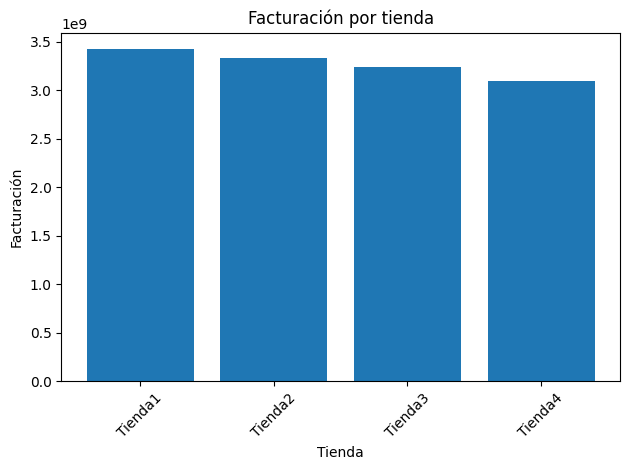

In [34]:
# Facturación por tienda
import matplotlib.pyplot as plt

# Listas separadas de tiendas y facturación
tiendas = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']
facturacion = [3.422718e+09, 3.337189e+09, 3.243817e+09, 3.098827e+09]

fig, ax = plt.subplots()
ax.bar(tiendas, facturacion)
ax.set_title('Facturación por tienda')
ax.set_xlabel('Tienda')
ax.set_ylabel('Facturación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

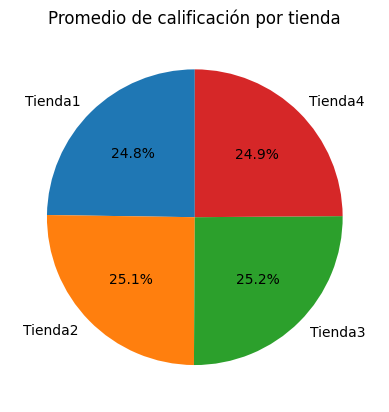

In [36]:
import matplotlib.pyplot as plt

# Diccionario con promedios de calificación
promedios = {
    'Tienda1': 3.976685036032217,
    'Tienda2': 4.037303942348453,
    'Tienda3': 4.048325561678677,
    'Tienda4': 3.9957591178965224
}

# Extraer tiendas y valores de calificación
tiendas = list(promedios.keys())
calificaciones = list(promedios.values())

# Crear el gráfico
fig, ax = plt.subplots()
ax.pie(calificaciones, labels=tiendas, autopct='%1.1f%%', startangle=90)
ax.set_title('Promedio de calificación por tienda')

plt.show()

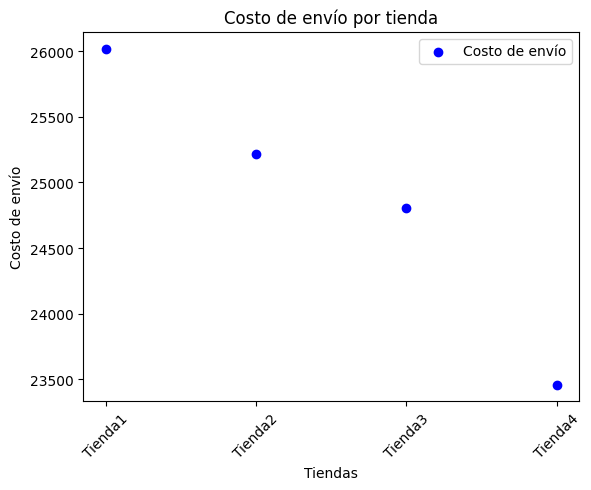

In [38]:
import matplotlib.pyplot as plt

# Datos de costos de envío promedio por tienda
tiendas = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']
costos_envio = [26018.61, 25216.24, 24805.68, 23459.46]

# Convertir etiquetas en números para graficarlas
x_values = range(1, len(tiendas) + 1)

# Crear el gráfico de dispersión
fig, ax = plt.subplots()
ax.scatter(x_values, costos_envio, color='blue', label='Costo de envío')

# Personalizar el gráfico
ax.set_title('Costo de envío por tienda')
ax.set_xlabel('Tiendas')
ax.set_ylabel('Costo de envío')
ax.set_xticks(x_values)
ax.set_xticklabels(tiendas, rotation=45)  # Mostrar nombres de tiendas
ax.legend()

plt.show()